<a href="https://colab.research.google.com/github/syifaafnani/stock-analysis/blob/main/Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
stock_data = pd.read_csv('/content/ALGO-USD (1).csv') # Data from Yahoo Finance 2019 - 2024
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-21,3.278668,3.280179,2.391997,3.201412,3.201412,133488812.0
1,2019-06-22,3.153618,3.155807,1.876100,2.158967,2.158967,223603358.0
2,2019-06-23,2.160110,2.201109,1.776865,1.890702,1.890702,177290665.0
3,2019-06-24,1.890702,1.984108,1.302322,1.383728,1.383728,184117575.0
4,2019-06-25,1.374857,1.825113,1.314638,1.537290,1.537290,277665414.0


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1720 non-null   object 
 1   Open       1719 non-null   float64
 2   High       1719 non-null   float64
 3   Low        1719 non-null   float64
 4   Close      1719 non-null   float64
 5   Adj Close  1719 non-null   float64
 6   Volume     1719 non-null   float64
dtypes: float64(6), object(1)
memory usage: 94.2+ KB


In [ ]:
stock_data = stock_data[['Date','Open','Close']] # Extracting required columns
stock_data['Date'] = pd.to_datetime(stock_data['Date'].apply(lambda x: x.split()[0])) # Selecting only date
stock_data.set_index('Date',drop=True,inplace=True) # Setting date column as index
stock_data.dropna(inplace=True)
stock_data.head()

,Open,Close
Date,,
2019-06-21,3.278668,3.201412
2019-06-22,3.153618,2.158967
2019-06-23,2.160110,1.890702
2019-06-24,1.890702,1.383728
2019-06-25,1.374857,1.537290


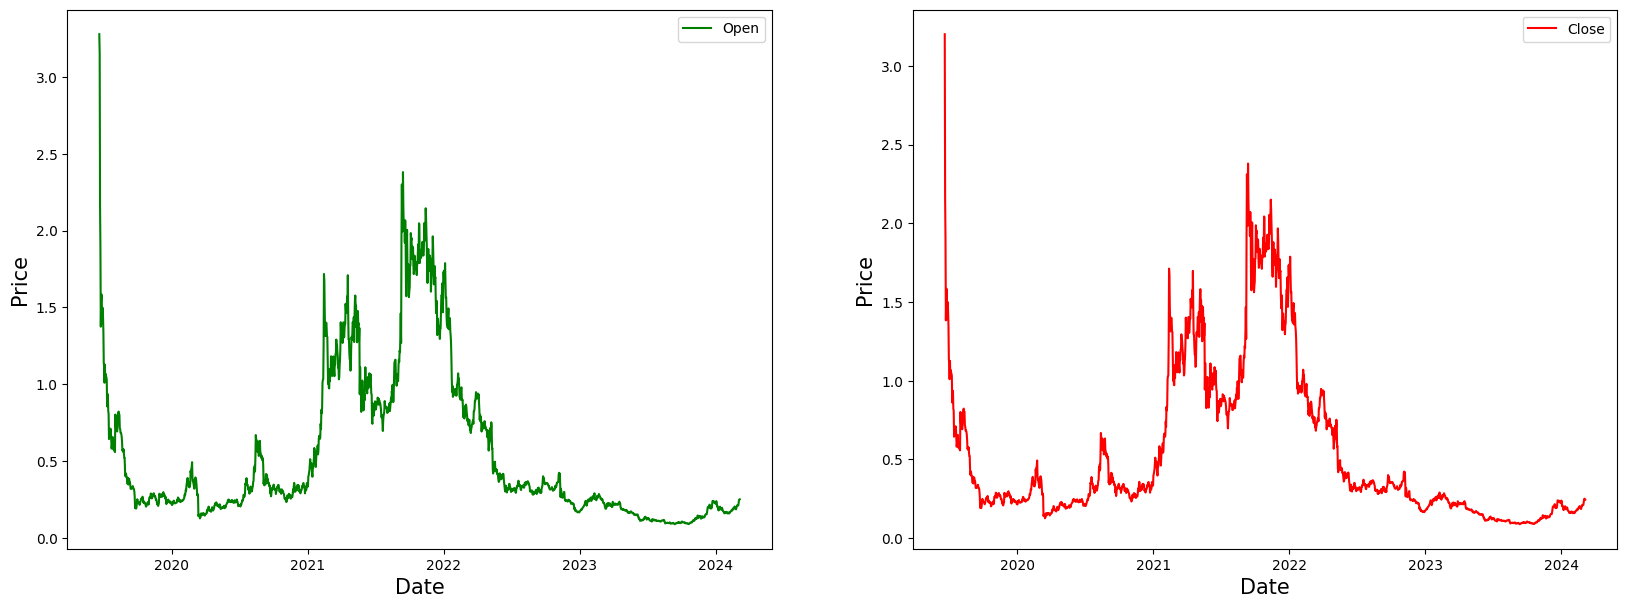

In [ ]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(stock_data['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(stock_data['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

## Data Pre Processing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
stock_data[stock_data.columns] = MMS.fit_transform(stock_data)

In [ ]:
stock_data.shape

(1719, 2)

In [ ]:
training_size = round(len(stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1375

In [ ]:
train_data = stock_data[:training_size]
test_data  = stock_data[training_size:]

train_data.shape, test_data.shape

((1375, 2), (344, 2))

In [ ]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1325, 50, 2), (1325, 2), (294, 50, 2), (294, 2))

## Creating LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
42/42 [==============================] - 8s 81ms/step - loss: 0.0055 - mean_absolute_error: 0.0457 - val_loss: 6.4774e-05 - val_mean_absolute_error: 0.0064
Epoch 2/80
42/42 [==============================] - 2s 44ms/step - loss: 0.0015 - mean_absolute_error: 0.0228 - val_loss: 3.2253e-05 - val_mean_absolute_error: 0.0045
Epoch 3/80
42/42 [==============================] - 3s 66ms/step - loss: 0.0013 - mean_absolute_error: 0.0207 - val_loss: 3.8418e-05 - val_mean_absolute_error: 0.0046
Epoch 4/80
42/42 [==============================] - 2s 49ms/step - loss: 0.0012 - mean_absolute_error: 0.0197 - val_loss: 6.4903e-05 - val_mean_absolute_error: 0.0073
Epoch 5/80
42/42 [==============================] - 2s 45ms/step - loss: 0.0012 - mean_absolute_error: 0.0201 - val_loss: 2.0635e-05 - val_mean_absolute_error: 0.0032
Epoch 6/80
42/42 [==============================] - 2s 45ms/step - loss: 0.0011 - mean_absolute_error: 0.0184 - val_loss: 2.5842e-05 - val_mean_absolute_error: 0.004

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

10/10 [==============================] - 1s 14ms/step


array([[0.02020688, 0.01873508],
       [0.02106203, 0.01964267],
       [0.0219962 , 0.02067198],
       [0.02146154, 0.02028906],
       [0.02086044, 0.01972042]], dtype=float32)

In [ ]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[0.15301135, 0.1468609 ],
       [0.15573938, 0.1496861 ],
       [0.15871948, 0.1528902 ],
       [0.15701385, 0.15169823],
       [0.15509629, 0.14992812]], dtype=float32)

## Visualizing predicted and actual data

In [ ]:
# Merging actual and predicted data for better visualization

gs_slic_data = pd.concat([stock_data.iloc[-294:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=stock_data.iloc[-294:].index)], axis=1)

In [ ]:
gs_slic_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2023-05-16,0.166955,0.169541,0.153011,0.146861
2023-05-17,0.169542,0.172323,0.155739,0.149686
2023-05-18,0.172319,0.165467,0.158719,0.152890
2023-05-19,0.165443,0.165023,0.157014,0.151698
2023-05-20,0.165039,0.164626,0.155096,0.149928


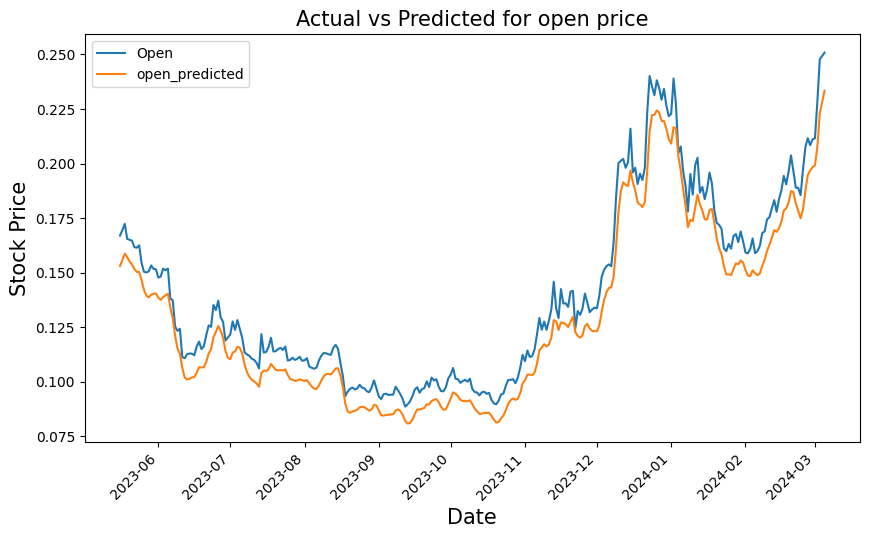

In [ ]:
gs_slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

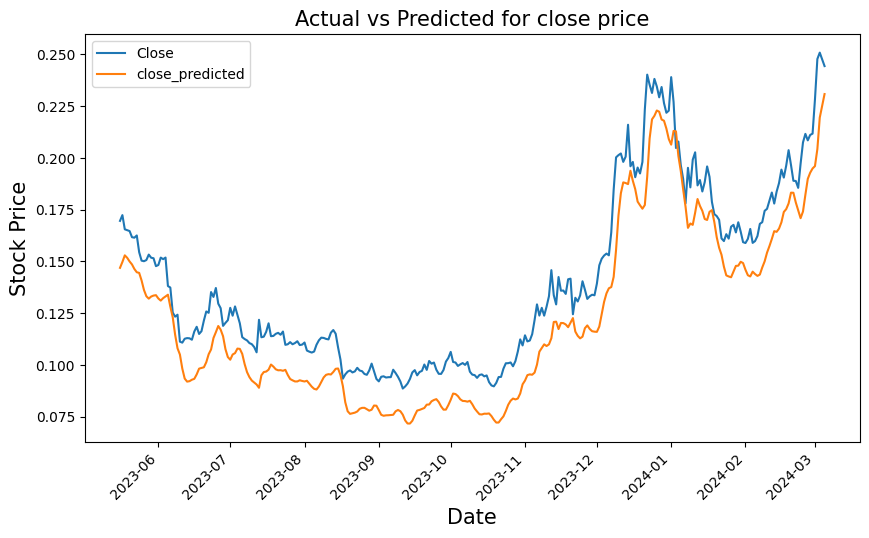

In [ ]:
gs_slic_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [ ]:
# Creating a dataframe and adding 10 days to existing index

gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))

In [ ]:
gs_slic_data['2024-03-01	':'2024-03-10']

,Open,Close,open_predicted,close_predicted
2024-03-01,0.211624,0.228250,0.199141,0.195992
2024-03-02,0.228328,0.247732,0.207626,0.204220
2024-03-03,0.247778,0.250821,0.222938,0.219430
2024-03-05,0.250839,0.244317,0.233402,0.230797
2024-03-06,NaN,NaN,NaN,NaN
2024-03-07,NaN,NaN,NaN,NaN
2024-03-08,NaN,NaN,NaN,NaN
2024-03-09,NaN,NaN,NaN,NaN
2024-03-10,NaN,NaN,NaN,NaN


In [ ]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [ ]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 28ms/step


In [ ]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

In [ ]:
upcoming_prediction.loc['2024-03-01':,'Open']

2024-03-01         NaN
2024-03-02         NaN
2024-03-03         NaN
2024-03-05         NaN
2024-03-06    0.233402
2024-03-07    0.228272
2024-03-08    0.220925
2024-03-09    0.212946
2024-03-10    0.204384
2024-03-11    0.195180
2024-03-12    0.185332
2024-03-13    0.174888
2024-03-14    0.163917
2024-03-15    0.152498
Name: Open, dtype: float64

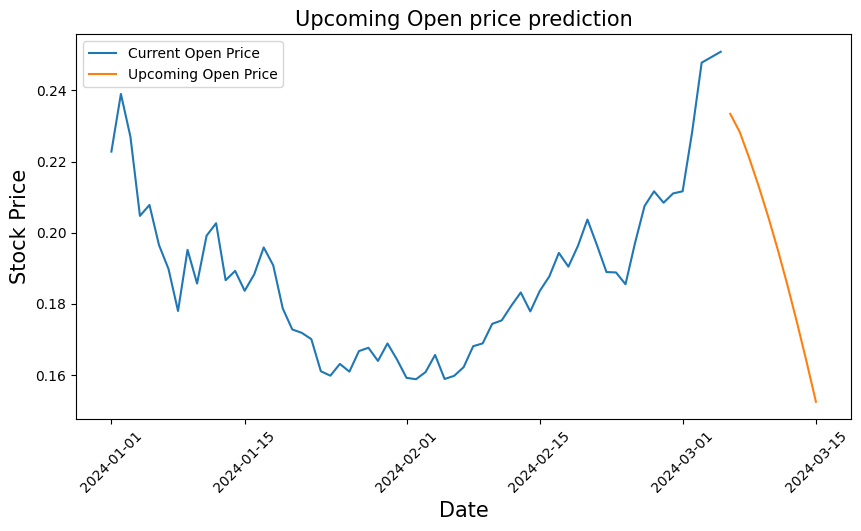

In [ ]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2024-01-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2024-01-01':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

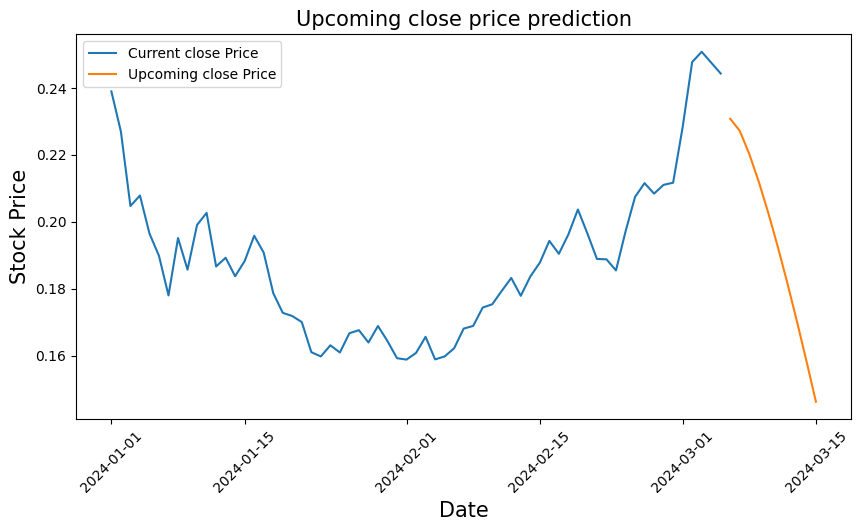

In [ ]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2024-01-01':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2024-01-01':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()